<a href="https://colab.research.google.com/github/Unicorndy/Stock_analysis_Pandas_Scikit_Learn/blob/master/Stock_analysis_with_pandas_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix


start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 9, 24)

df = web.DataReader("NXPI", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-17,107.980003,106.309998,106.730003,107.760002,1482500.0,107.760002
2019-09-18,108.930000,106.400002,107.250000,107.820000,1252100.0,107.820000
2019-09-19,109.080002,107.919998,108.139999,108.360001,1368000.0,108.360001
2019-09-20,108.940002,104.489998,108.459999,104.800003,3249700.0,104.800003
2019-09-23,107.010002,104.309998,104.800003,106.050003,1637500.0,106.050003


Date
2019-09-10    98.167646
2019-09-11    98.264098
2019-09-12    98.381921
2019-09-13    98.504928
2019-09-16    98.585401
2019-09-17    98.692126
2019-09-18    98.786330
2019-09-19    98.896868
2019-09-20    98.895075
2019-09-23    98.912043
Name: Adj Close, dtype: float64


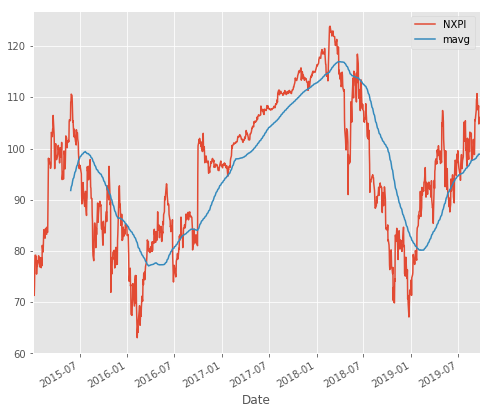

In [11]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
print(mavg.tail(10))

#Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='NXPI')
mavg.plot(label='mavg')
plt.legend()

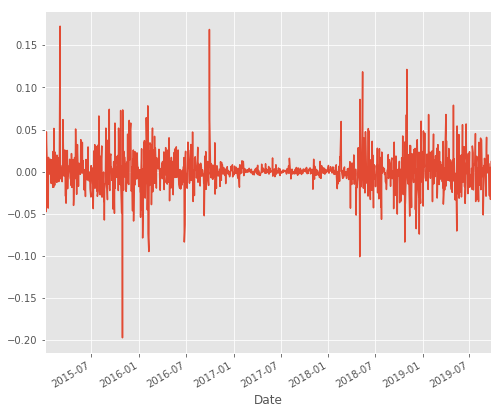

In [12]:
#Return Deviation — to determine risk and return
ets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [37]:
dfcomp = web.DataReader(['NXPI', 'QCOM','AAPL', 'GOOG', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail(10)

Symbols,AAPL,GOOG,MSFT,NXPI,QCOM
Date,,,,,
2019-09-10,216.699997,1206.000000,136.080002,107.492401,78.090004
2019-09-11,223.589996,1220.170044,136.119995,109.625107,79.900002
2019-09-12,223.089996,1234.250000,137.520004,109.654999,79.080002
2019-09-13,218.750000,1239.560059,137.320007,110.730003,78.410004
2019-09-16,219.899994,1231.300049,136.330002,107.570000,78.040001
2019-09-17,220.699997,1229.150024,137.389999,107.760002,78.690002
2019-09-18,222.770004,1232.410034,138.520004,107.820000,78.900002
2019-09-19,220.960007,1238.709961,141.070007,108.360001,78.230003
2019-09-20,217.729996,1229.930054,139.440002,104.800003,76.440002


In [43]:
#Correlation Analysis — Does one competitor affect others?
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
print(corr)

Symbols      AAPL      GOOG      MSFT      NXPI      QCOM
Symbols                                                  
AAPL     1.000000  0.521176  0.576433  0.369462  0.377861
GOOG     0.521176  1.000000  0.658366  0.259814  0.300714
MSFT     0.576433  0.658366  1.000000  0.330151  0.366374
NXPI     0.369462  0.259814  0.330151  1.000000  0.338171
QCOM     0.377861  0.300714  0.366374  0.338171  1.000000


Text(0, 0.5, 'Returns QCOM')

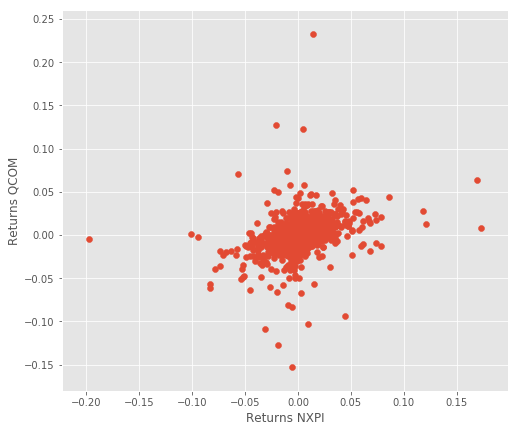

In [39]:
plt.scatter( retscomp.NXPI, retscomp.QCOM)
plt.xlabel('Returns NXPI')
plt.ylabel('Returns QCOM')

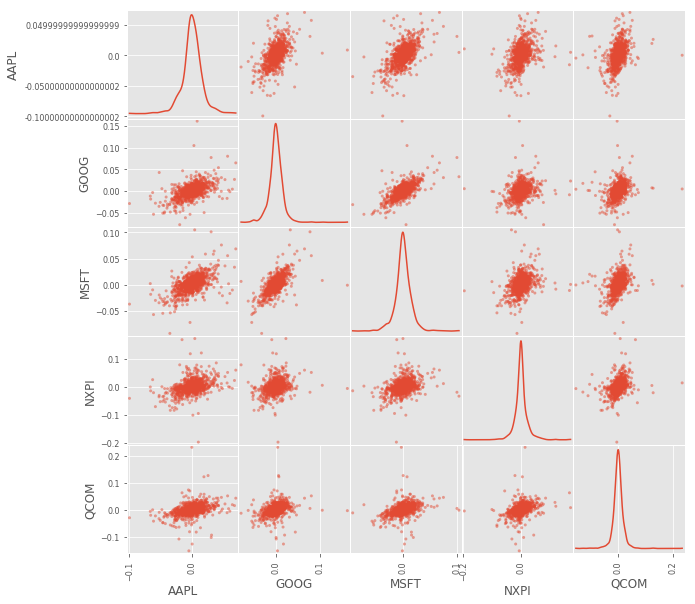

In [42]:
#scatter_matrix to visualize possible correlations among competing stocks
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

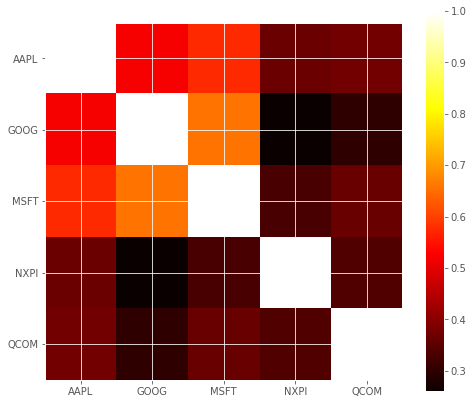

In [41]:
#Using heatmap to prove the positive correlations among the selected stock
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

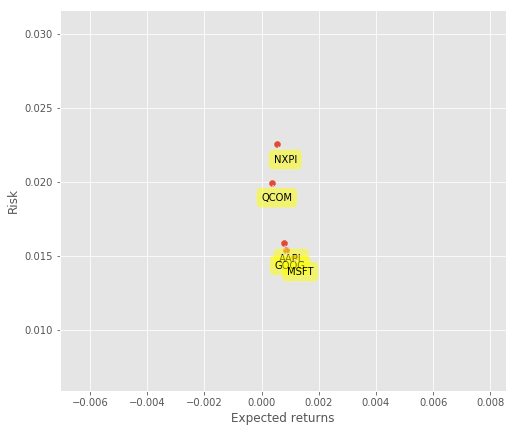

In [51]:
#Stocks Returns Rate and Risk
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

In [57]:
#High Low Percentage and Percentage Change
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
print(dfreg.tail(10))

             Adj Close     Volume    HL_PCT  PCT_change
Date                                                   
2019-09-10  107.492401  3374200.0  2.827735    1.219973
2019-09-11  109.625107  3418500.0  2.663637    2.201991
2019-09-12  109.654999  3031000.0  2.081251   -0.335147
2019-09-13  110.730003  1751100.0  2.339019    1.012589
2019-09-16  107.570000  1980600.0  2.370552   -1.528742
2019-09-17  107.760002  1482500.0  1.549746    0.965051
2019-09-18  107.820000  1252100.0  2.346502    0.531468
2019-09-19  108.360001  1368000.0  1.070509    0.203441
2019-09-20  104.800003  3249700.0  4.246187   -3.374512
2019-09-23  106.050003  1637500.0  2.545973    1.192748


In [0]:
#Pre-processing & Cross Validation
import math
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
#Model Generation — Where the prediction fun starts
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [74]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [75]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [76]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [77]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print('The Linear regression confidence: ' +  str(confidencereg))
print('The Quadratic Regression 2 confidence: ' +  str(confidencepoly2))
print('The Quadratic Regression 3 confidence: ' +  str(confidencepoly3))
print('The KNN Regression confidence: ' +  str(confidenceknn))

The Linear regression confidence: 0.7893493031366416
The Quadratic Regression 2 confidence: 0.7919698975806313
The Quadratic Regression 3 confidence: 0.7484687775484962
The KNN Regression confidence: 0.711393780439357


In [83]:
forecast_set = clfpoly2.predict(X_lately)
dfreg['Forecast'] = np.nan

print(forecast_set)



[104.76569687 103.20845315 104.28637757 106.34968344 107.39859801
 107.90622386 105.82435967 106.4456997  105.51733401 107.66932
 102.56294362 103.65627862]


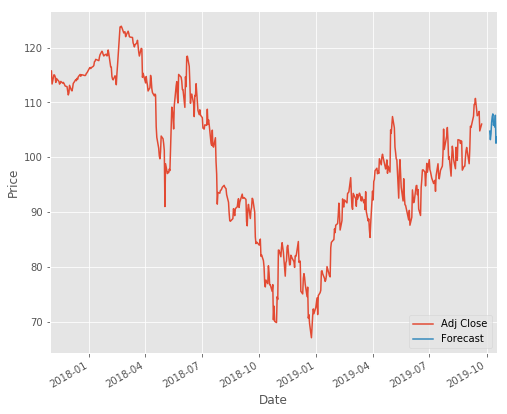

In [84]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

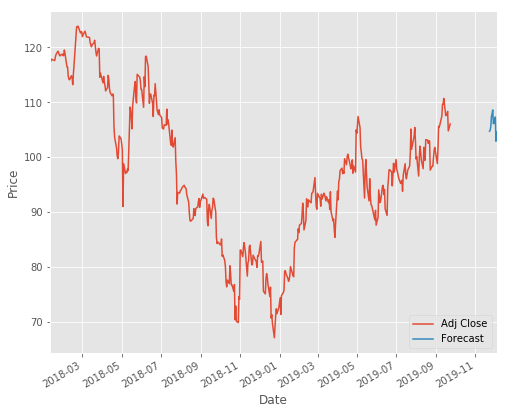

In [88]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()